In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# KPEB1 데이터 추출

In [2]:
df_kpeb1 = pd.read_csv('./211109_kpeb1.csv', parse_dates = True)

In [3]:
# df_kpeb1.drop(['Unnamed: 0'], inplace = True, axis =1 )

In [4]:
df_kpeb1['Time']= pd.to_datetime(df_kpeb1['Time'])

In [5]:
df_kpeb1=df_kpeb1.fillna(0)

In [6]:
df_kpeb1

,Time,Cons_kpeb1(W),Prod_kpeb1(W),Cons_acc_kpeb1(Wh),Prod_acc_kpeb1(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
0,2021-09-13 00:00:00,5695.0,0.0,9.491667e+01,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2021-09-13 00:01:00,5284.0,0.0,1.829833e+02,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2021-09-13 00:02:00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2021-09-13 00:03:00,5551.0,0.0,2.755000e+02,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2021-09-13 00:04:00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74875,2021-11-03 23:55:00,6076.0,0.0,8.487453e+06,5.437472e+06,0.0,5.437472e+06,0.0,0.0,1.0,0.640648,0.640648,0.820324
74876,2021-11-03 23:56:00,6179.0,0.0,8.487556e+06,5.437472e+06,0.0,5.437472e+06,0.0,0.0,1.0,0.640640,0.640640,0.820320
74877,2021-11-03 23:57:00,6468.0,0.0,8.487664e+06,5.437472e+06,0.0,5.437472e+06,0.0,0.0,1.0,0.640632,0.640632,0.820316
74878,2021-11-03 23:58:00,6496.0,0.0,8.487772e+06,5.437472e+06,0.0,5.437472e+06,0.0,0.0,1.0,0.640624,0.640624,0.820312


# KPEB2 데이터 추출

In [7]:
df_kpeb2 = pd.read_csv('./211109_kpeb2.csv', parse_dates = True)

In [8]:
# df_kpeb2.drop(['Unnamed: 0'], inplace = True, axis =1 )

In [9]:
df_kpeb2['Time']= pd.to_datetime(df_kpeb2['Time'])

In [10]:
df_kpeb2=df_kpeb2.fillna(0)

In [11]:
df_kpeb2

,Time,Cons_kpeb2(W),Prod_kpeb2(W),Cons_acc_kpeb2(Wh),Prod_acc_kpeb2(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
0,2021-09-13 00:01:00,25.0,0.0,0.416667,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-09-13 00:02:00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-09-13 00:03:00,25.0,0.0,0.833333,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-09-13 00:04:00,25.0,0.0,1.250000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-09-13 00:05:00,24.0,1.0,1.650000,0.016667,1.0,0.016667,1.0,0.041667,1.000000,0.010101,0.010101,0.505051
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74874,2021-11-03 23:55:00,122.0,0.0,107973.416667,647366.166667,0.0,107973.416667,0.0,0.000000,0.166789,1.000000,5.995607,0.583394
74875,2021-11-03 23:56:00,123.0,0.0,107975.466667,647366.166667,0.0,107975.466667,0.0,0.000000,0.166792,1.000000,5.995493,0.583396
74876,2021-11-03 23:57:00,127.0,0.0,107977.583333,647366.166667,0.0,107977.583333,0.0,0.000000,0.166795,1.000000,5.995376,0.583398
74877,2021-11-03 23:58:00,127.0,0.0,107979.700000,647366.166667,0.0,107979.700000,0.0,0.000000,0.166798,1.000000,5.995258,0.583399


# KPEB합치기

In [12]:
df_kpeb = pd.DataFrame()
df_kpeb['Time'] = df_kpeb1['Time']

In [13]:
df_kpeb=df_kpeb.set_index('Time')
df_kpeb1=df_kpeb1.set_index('Time')
df_kpeb2=df_kpeb2.set_index('Time')

In [14]:
df_kpeb['Cons_kpeb(W)'] = df_kpeb1['Cons_kpeb1(W)']+df_kpeb2['Cons_kpeb2(W)']
df_kpeb['Prod_kpeb(W)'] = df_kpeb1['Prod_kpeb1(W)']+df_kpeb2['Prod_kpeb2(W)']
df_kpeb['Cons_acc_kpeb(Wh)'] = df_kpeb1['Cons_acc_kpeb1(Wh)']+df_kpeb2['Cons_acc_kpeb2(Wh)']
df_kpeb['Prod_acc_kpeb(Wh)'] = df_kpeb1['Prod_acc_kpeb1(Wh)']+df_kpeb2['Prod_acc_kpeb2(Wh)']

In [15]:
df_kpeb['denominator'] = df_kpeb.loc[:,['Cons_kpeb(W)','Prod_kpeb(W)']].min(axis=1)
df_kpeb['denominator_acc'] = df_kpeb.loc[:,['Cons_acc_kpeb(Wh)','Prod_acc_kpeb(Wh)']].min(axis=1)

In [16]:
df_kpeb['SCF'] = df_kpeb['denominator']/df_kpeb['Prod_kpeb(W)']
df_kpeb['LCF'] = df_kpeb['denominator']/df_kpeb['Cons_kpeb(W)']

In [17]:
df_kpeb['SCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Prod_acc_kpeb(Wh)']
df_kpeb['LCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['self_sustain'] = df_kpeb['Prod_acc_kpeb(Wh)']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['Avg_SCF&LCF'] = (df_kpeb['SCF_acc']+df_kpeb['LCF_acc'])/2

In [18]:
df_kpeb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74880 entries, 2021-09-13 00:00:00 to 2021-11-03 23:59:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cons_kpeb(W)       74879 non-null  float64
 1   Prod_kpeb(W)       74879 non-null  float64
 2   Cons_acc_kpeb(Wh)  74879 non-null  float64
 3   Prod_acc_kpeb(Wh)  74879 non-null  float64
 4   denominator        74879 non-null  float64
 5   denominator_acc    74879 non-null  float64
 6   SCF                41162 non-null  float64
 7   LCF                66085 non-null  float64
 8   SCF_acc            65991 non-null  float64
 9   LCF_acc            66090 non-null  float64
 10  self_sustain       66090 non-null  float64
 11  Avg_SCF&LCF        65991 non-null  float64
dtypes: float64(12)
memory usage: 7.4 MB


In [19]:
df_kpeb

,Cons_kpeb(W),Prod_kpeb(W),Cons_acc_kpeb(Wh),Prod_acc_kpeb(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
Time,,,,,,,,,,,,
2021-09-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:01:00,5309.0,0.0,1.834000e+02,0.0,0.0,0.0,NaN,0.0,NaN,0.000000,0.000000,NaN
2021-09-13 00:02:00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:03:00,5576.0,0.0,2.763333e+02,0.0,0.0,0.0,NaN,0.0,NaN,0.000000,0.000000,NaN
2021-09-13 00:04:00,25.0,0.0,1.250000e+00,0.0,0.0,0.0,NaN,0.0,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03 23:55:00,6198.0,0.0,8.595426e+06,6084837.8,0.0,6084837.8,NaN,0.0,1.0,0.707916,0.707916,0.853958
2021-11-03 23:56:00,6302.0,0.0,8.595531e+06,6084837.8,0.0,6084837.8,NaN,0.0,1.0,0.707907,0.707907,0.853954
2021-11-03 23:57:00,6595.0,0.0,8.595641e+06,6084837.8,0.0,6084837.8,NaN,0.0,1.0,0.707898,0.707898,0.853949


In [20]:
df_kpeb.to_csv('./211109_kpeb1&2_ver2.csv')

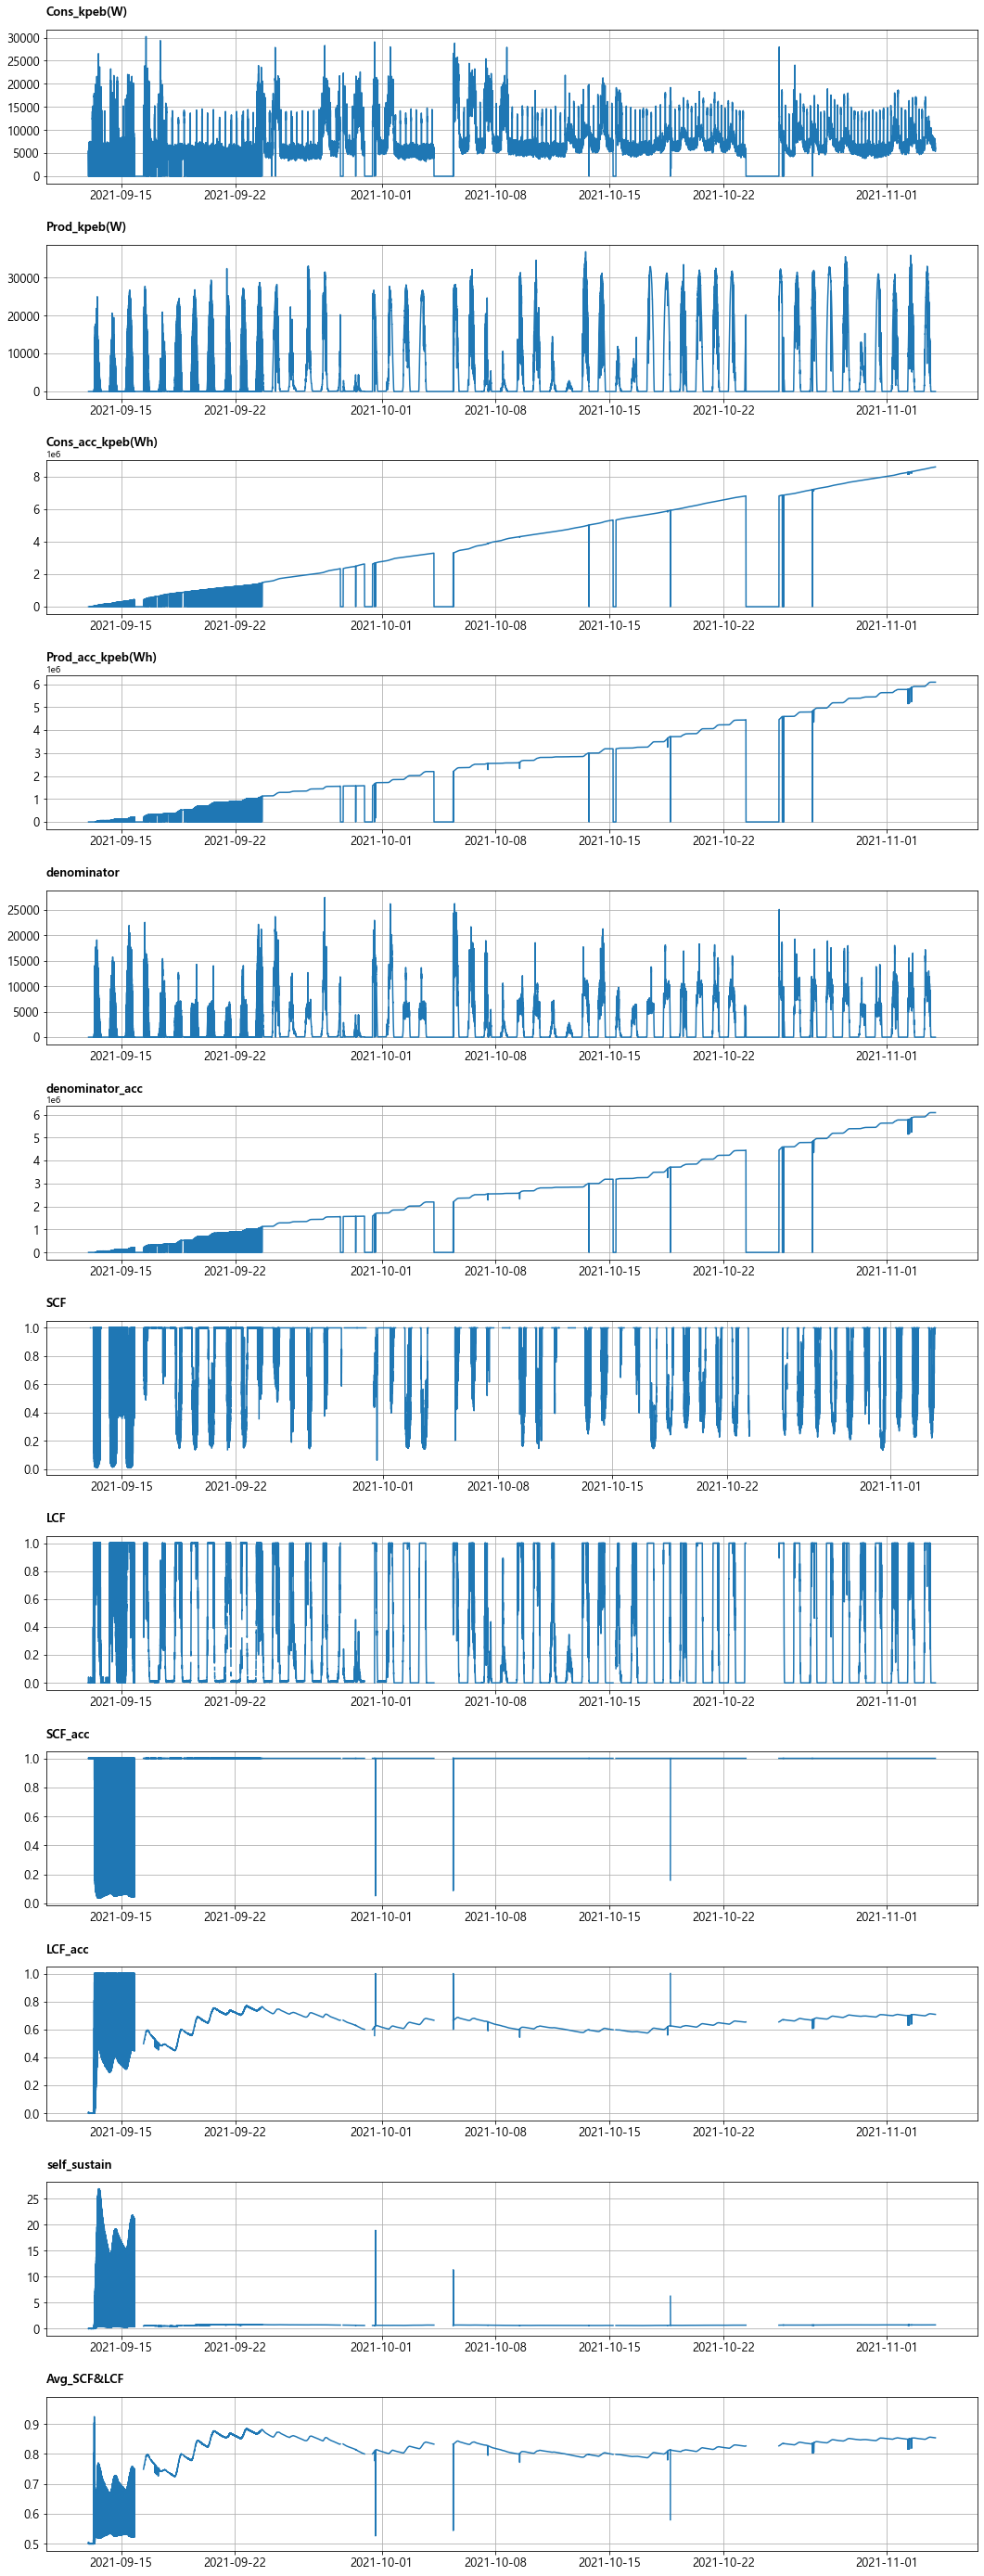

In [21]:
fig, ax = plt.subplots(figsize=(18,50))

for i in range(len(df_kpeb.columns)):
    plt.subplot(len(df_kpeb.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df_kpeb.columns[i]
    plt.plot(df_kpeb[name])    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
#     plt.xlim(pd.Timestamp('2020-11-01'), pd.Timestamp('2021-08-31'))    
    plt.grid(True)
plt.show()
fig.tight_layout()